<a href="https://colab.research.google.com/github/Satinder83/AI_ML/blob/master/Satinder_pgpaimldec19_Neural_Networks_and_Deep_Learning_R7_INN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import h5py
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report


## Loading Data
The data could not be loaded using the instructions on the pdf doc shared as getting error incorret path. So as a workaround, the data file was uploaded to My Drive


In [29]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
dataset= h5py.File('/content/drive/My Drive/Data/SVHN_single_grey1.h5', 'r')

Splitting data to Train and Test

In [31]:
x_train = dataset['X_train'][:]
y_train = dataset['y_train'][:]
x_test = dataset['X_test'][:]
y_test = dataset['y_test'][:]

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


Vsulaizing data

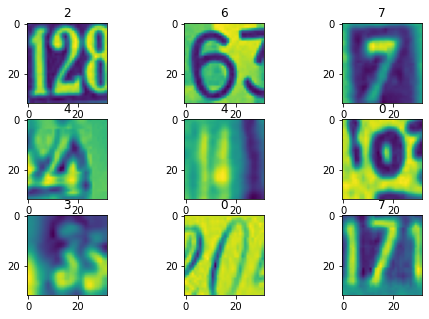

In [33]:
plt.figure(figsize= (8,5))
for i in range(9):
    plt.subplot(330+ i +1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])


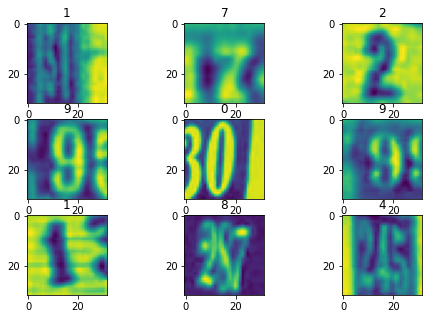

In [34]:
plt.figure(figsize= (8,5))
for i in range(9):
    plt.subplot(330+ i +1)
    plt.imshow(x_test[i])
    plt.title(y_test[i])

In [35]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Data Distribution

<Figure size 720x576 with 0 Axes>

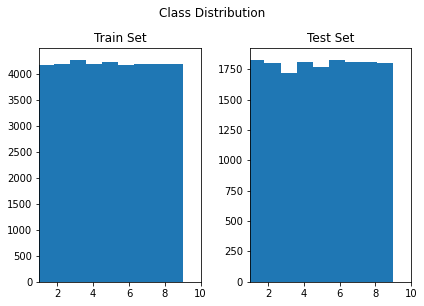

In [39]:
plt.figure(figsize= (10,8))

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)

fig.suptitle('Class Distribution', fontsize = 12, y = 1.05)

ax1.hist(y_train, bins= 10)
ax1.set_title('Train Set')
ax1.set_xlim(1, 10)

ax2.hist(y_test, bins= 10)
ax2.set_title('Test Set')
ax2.set_xlim(1, 10)
fig.tight_layout()


Classes seems to be distributed equally, so this is a good thing

Normalizing data and converting to Float 32

In [43]:
x_train = (x_train/255.0).astype('float32')
x_test = (x_test/255.0).astype('float32')

In [45]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

Builing DNN Model

In [84]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape= [32,32]),
        keras.layers.BatchNormalization(),
        
        keras.layers.Dense(512, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(512, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(256, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(32, activation= 'relu', kernel_initializer= 'he_normal'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(10, activation= 'softmax')
                  
])

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)              

Compiling and Predictions

In [107]:
weight = model1.get_weights()

In [111]:
weight

[array([[-0.0492842 , -0.01688813, -0.03406978,  0.02569183, -0.05966563],
        [-0.03339621,  0.03432623,  0.04579709,  0.06274825,  0.02180713],
        [ 0.03368603,  0.0306443 , -0.0131965 , -0.04667648, -0.0743413 ],
        ...,
        [ 0.04665424, -0.00076761,  0.02684751, -0.0109617 , -0.06328017],
        [-0.01415326, -0.02489006, -0.03418462, -0.09952925, -0.02192111],
        [-0.01194079, -0.0114714 , -0.03623415,  0.00534326, -0.0293601 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.701103  ,  1.0607846 ,  1.3263263 ,  0.03253563],
        [-0.39875522,  0.41568837, -1.2706605 , -0.4098448 ],
        [ 0.269276  ,  0.22738998, -1.2784246 , -0.03052116],
        [-0.68189865, -0.45814613,  0.5281421 ,  0.70409167],
        [-0.25364512, -0.4301872 ,  0.43670872, -1.379575  ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [86]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'] )

In [87]:
import os

In [88]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [89]:
run_logdir = get_run_logdir()

In [90]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 5)

In [91]:
chk_pt= keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights= True)

In [92]:
history= model.fit(x_train, y_train, epochs= 200, validation_split= 0.2, 
                   callbacks= [chk_pt, early_stop, lr_scheduler], batch_size= 512)

Epoch 1/200
66/66 [==============================] - 6s 92ms/step - loss: 2.5761 - accuracy: 0.1443 - val_loss: 2.3166 - val_accuracy: 0.1439
Epoch 2/200
66/66 [==============================] - 6s 88ms/step - loss: 1.9946 - accuracy: 0.2955 - val_loss: 1.8169 - val_accuracy: 0.3950
Epoch 3/200
66/66 [==============================] - 6s 88ms/step - loss: 1.6018 - accuracy: 0.4435 - val_loss: 1.4050 - val_accuracy: 0.5601
Epoch 4/200
66/66 [==============================] - 6s 90ms/step - loss: 1.3598 - accuracy: 0.5476 - val_loss: 1.1420 - val_accuracy: 0.6399
Epoch 5/200
66/66 [==============================] - 6s 89ms/step - loss: 1.1886 - accuracy: 0.6176 - val_loss: 0.9599 - val_accuracy: 0.6942
Epoch 6/200
66/66 [==============================] - 6s 89ms/step - loss: 1.0670 - accuracy: 0.6671 - val_loss: 0.8472 - val_accuracy: 0.7343
Epoch 7/200
66/66 [==============================] - 6s 88ms/step - loss: 0.9789 - accuracy: 0.6952 - val_loss: 0.7961 - val_accuracy: 0.7532
Epoch 

In [60]:
import pandas as pd

Plotting the Train and Validation Loss plots

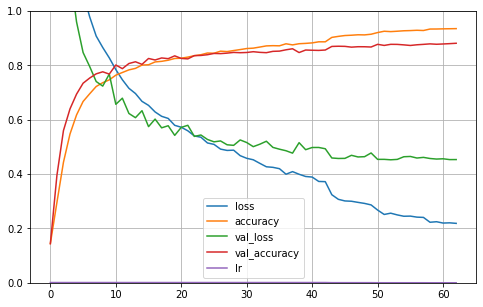

In [93]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The Model learning is as expected, the Global minimum has been reahced smoothly. The model could be improved using CNN

Model Evaluation on test set

In [94]:
model.evaluate(x_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.4570 - accuracy: 0.8743


[0.45698627829551697, 0.8742777705192566]

Model Has good Accuracy, no signs of over or underfitting. It could be improved by adding CNN layers. But that was out of scope of the project

In [63]:
x_new = x_test[:5]
y_proba= model.predict(x_new)
y_proba.round(2)

array([[0.29, 0.39, 0.03, 0.01, 0.09, 0.01, 0.08, 0.02, 0.05, 0.02],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [65]:
preds = model.predict(x_test)

Checking Model Prediction

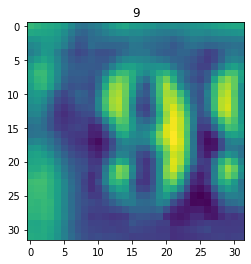

In [69]:
plt.imshow(x_test[5])
plt.title(np.argmax(preds[5]))
plt.show()

Print Classification Report

In [83]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1814
           1       0.88      0.88      0.88      1828
           2       0.89      0.89      0.89      1803
           3       0.84      0.83      0.84      1719
           4       0.90      0.90      0.90      1812
           5       0.85      0.87      0.86      1768
           6       0.87      0.85      0.86      1832
           7       0.89      0.91      0.90      1808
           8       0.85      0.84      0.84      1812
           9       0.86      0.86      0.86      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



Model Seems to be predictong all numbers with similar accuract. Even the Recall scores are high. 
There seems to be some confusion between 8 and 3, but this could be improved by CNN or by using class weight initialization 